# MNIST Digit Classification 🧠✍️

This notebook demonstrates a simple but powerful machine learning task: **classifying handwritten digits** using the MNIST dataset.

The **MNIST (Modified National Institute of Standards and Technology)** dataset is a classic benchmark in the field of machine learning and computer vision. It contains **70,000 grayscale images** of handwritten digits from 0 to 9—60,000 for training and 10,000 for testing. Each image is **28x28 pixels**.

In this notebook, we will:
- Load and explore the MNIST dataset
- Preprocess the data for model input
- Train a classifier 
- Evaluate its performance
- Visualize predictions and misclassifications

This project is a great starting point for anyone learning about image classification, deep learning, or neural networks. Let's get started! 🚀


## Load Data

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import clone

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

In [2]:
minst = fetch_openml('mnist_784', version=1)
minst.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = minst['data'], minst['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
numerical_data = pd.concat([X, y], axis=1)
numerical_data_5 = numerical_data[numerical_data['class'] == '5']
numerical_data_5.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [7]:
digit = X[:1].to_numpy()
digit_image = digit.reshape(28, 28)

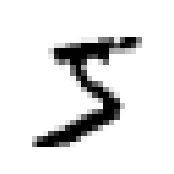

In [8]:
plt.figure(figsize=(2, 2))
plt.imshow(digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [9]:
y[0]

'5'

## Data Split

- The MNIST dataset already split into a training and a test set the last 10,000 images.

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [11]:
y_train_5 = (y_train == '5')
y_test5 = (y_test == '5')

In [12]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [13]:
some_digit = X[1:2].to_numpy()
some_digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
        159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
        252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [14]:
some_digit_image = some_digit.reshape(28, 28)

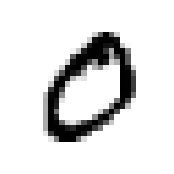

In [15]:
plt.figure(figsize=(2, 2))
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [16]:
digit_five = numerical_data.drop(columns=['class']).iloc[[65]].to_numpy()
digit_five

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [17]:
digit_five_image = digit_five.reshape(28, 28)

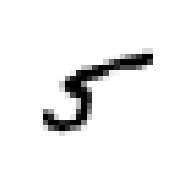

In [18]:
plt.figure(figsize=(2, 2))
plt.imshow(digit_five_image, cmap="binary")
plt.axis("off")
plt.show()

In [19]:
sgd_clf.predict(digit_five)

/opt/anaconda3/envs/ml-sklearn/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Implementing Cross-Validation

In [20]:
# It splits the data into 3 parts (folds).
#  Stratified means each fold will have the same proportion of classes
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
for train_inddex, test_index in skfold.split(X_train, y_train_5):

    # This makes a fresh copy of classifier so it doesn't "remember" training from earlier folds.
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train.iloc[train_inddex]
    y_train_folds = y_train_5.iloc[train_inddex]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)

    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9598333333333333
0.962
0.9421666666666667
0.9673333333333334
0.9541666666666667


In [22]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy" )

array([0.95035, 0.96035, 0.9604 ])

In [23]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) 

### Confusion Matrix

In [24]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

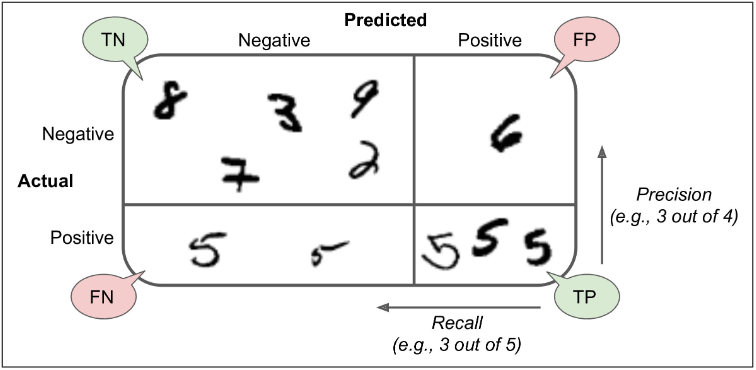

### Precision


A **positive prediction** means that the model thinks something **belongs to the positive class**.

- Out of all the positive predictions the model made, how many were actually correct?

    - 🟢 “Yes, this is a positive case!”


$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
$$



### Recall


A **recall** tells us how well the model identifies actual positive cases.

- Out of all the actual positive cases, how many did the model correctly identify?

    - 🔵 “Yes, this really is a positive case!”

    
$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negative (FN)}}
$$

In [25]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [26]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [27]:
accuracy_score(y_train_5, y_train_pred)

0.9570333333333333

### F1

A **F1** score is a harmonic mean of precision and recall. 

$$
\text{F1} = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}} \text{F1} = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}

$$

In [28]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

### 🔁 Precision/Recall Trade-off

- **Precision** 
    - **TP / (TP + FP)**
    - Of all predicted positives, how many were correct?
- **Recall** 
    - **TP / (TP + FN)**
    - **TPR**
    - Of all actual positives, how many were found?
- **FPR**
    - **FP / (FP + TN)**
    - Of all actual negatives, how many were wrongly predicted as positive?

Improving one often makes the other worse. This is known as the **precision/recall trade-off**.

<br>
<strong>Example with digit classification (5 vs not-5)</strong>

---

Imagine a model that decides whether a handwritten digit is **5** or **not 5**.

- If we want **high precision**, the model becomes very careful before calling something a **5**.
  - ✅ Most predicted 5s are actually 5s.
  - ❌ But it might **miss** some actual 5s (low recall).
  
- If we want **high recall**, the model marks more digits as 5s to catch **every actual 5**.
  - ✅ We catch more real 5s.
  - ❌ But we might also mark **some non-5s as 5** (low precision).

So, increasing precision may **decrease recall**, and increasing recall may **decrease precision**.

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [30]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

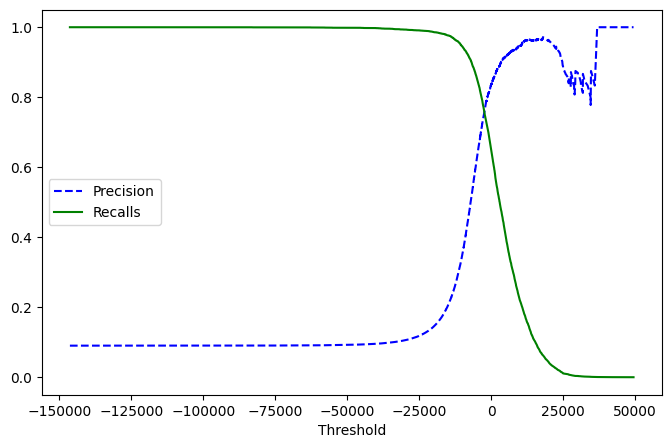

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, precisions[:-1], linestyle="--", color="blue",label="Precision")
    plt.plot(thresholds, recalls[:-1], linestyle="-", color="green", label="Recalls")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [32]:
# lowest threshold that gives at least 90% precision 
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

np.float64(3370.0194991441826)

In [33]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [34]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [35]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## ROC

- It plots the true positive rate TPR also know as Recall against FPR.

In [36]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)   
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')

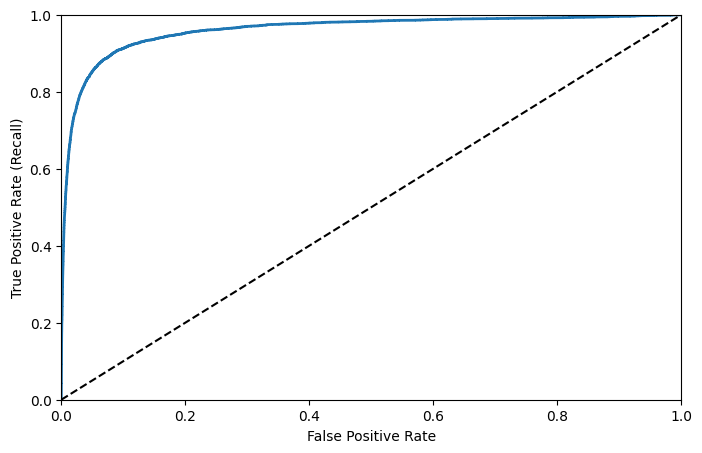

In [37]:
plt.figure(figsize=(8, 5))
plot_roc_curve(fpr, tpr)

## AUC - Area Under the Curve

- It's a single number (between 0 and 1) that summarizes the model’s performance.
- The higher the AUC, the better the model is at distinguishing between the classes.

In [38]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

#### RandomForestClassifier

In [39]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [40]:
y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

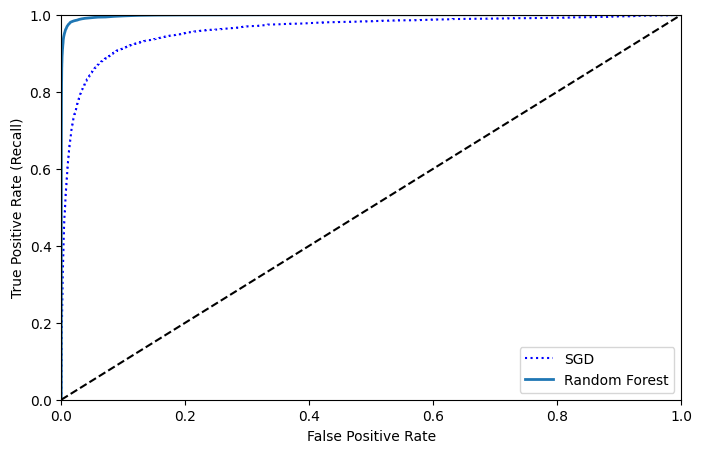

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [42]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983296721818179

## MultiClass Classification

In [43]:
X_train.shape

(60000, 784)

In [44]:
svm_clf = SVC()
svm_clf.fit(X_train[0:6000], y_train[0:6000])

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [45]:
some_digit_multy = X[26:27].to_numpy()

In [46]:
some_digit_multy_image = some_digit_multy.reshape(28, 28)

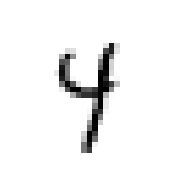

In [47]:
plt.figure(figsize=(2, 2))
plt.imshow(some_digit_multy_image, cmap="binary")
plt.axis("off")
plt.show()

In [48]:
svm_clf.predict(some_digit_multy)

/opt/anaconda3/envs/ml-sklearn/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['4'], dtype=object)

In [49]:
some_digit_multi_score = svm_clf.decision_function(some_digit_multy)
some_digit_multi_score

/opt/anaconda3/envs/ml-sklearn/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[-0.30074433,  2.7315218 ,  1.71763394,  6.24004294,  9.30574932,
         3.82709142,  0.7186907 ,  7.23891413,  5.19003888,  8.29579318]])

In [50]:
np.argmax(some_digit_multi_score)

np.int64(4)

In [51]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [52]:
svm_clf.classes_[4]

'4'

### One Vs Rest

In [53]:
# SVM
from sklearn.svm import SVC

In [79]:
X_train_ovr = X_train[0:6000].to_numpy()
Y_train_over = y_train[0:6000].to_numpy().astype(int)

In [55]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train_ovr, Y_train_over)

,estimator,SVC()
,n_jobs,None
,verbose,0
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


In [ ]:
some_digit_multy = X[27:28].to_numpy()
some_digit_multy_image_ovr = some_digit_multy.reshape(28, 28)

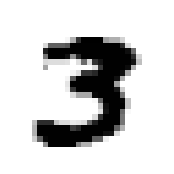

In [ ]:
plt.figure(figsize=(2, 2))
plt.imshow(some_digit_multy_image_ovr, cmap="binary")
plt.axis("off")
plt.show()

In [58]:
ovr_clf.predict(some_digit_multy)

array(['3'], dtype='<U1')

In [59]:
some_digit_multi_ovr_score = ovr_clf.decision_function(some_digit_multy)
some_digit_multi_ovr_score

array([[-2.0162631 , -2.03900825, -2.01563882,  2.15645795, -2.49831286,
        -2.12312845, -2.85162356, -1.81667836, -1.94263428, -1.99593028]])

In [60]:
cross_val_score(ovr_clf, X_train_ovr, Y_train_over, cv=3, scoring="accuracy")

array([0.9385, 0.952 , 0.948 ])

### Scaling

In [61]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_ovr.astype(np.float64))

In [62]:
cross_val_score(ovr_clf, X_train_scaled, Y_train_over, cv=3, scoring="accuracy")

array([0.9085, 0.9355, 0.916 ])

### Error Analysis

- Confusion Matrix

In [63]:
y_train_pred = cross_val_predict(ovr_clf, X_train_scaled, Y_train_over, cv=3)
conf_mx = confusion_matrix(Y_train_over, y_train_pred)
conf_mx

array([[579,   0,   1,   1,   2,   2,   3,   2,   2,   0],
       [  0, 651,   5,   0,   4,   1,   2,   6,   1,   1],
       [  5,   6, 518,   8,   4,   1,   4,  23,  11,   1],
       [  1,   5,  15, 547,   3,  12,   1,  19,   2,   3],
       [  0,   3,   7,   0, 576,   3,   7,   7,   0,  20],
       [  7,   2,   4,  15,   5, 455,   8,   5,   5,   8],
       [  4,   2,   7,   0,   4,   7, 567,  15,   2,   0],
       [  4,   7,   5,   0,   9,   0,   0, 601,   0,  25],
       [  4,   8,  10,   8,   3,  10,   7,   5, 491,   5],
       [  6,   2,   3,   7,  14,   2,   0,  30,   2, 535]])

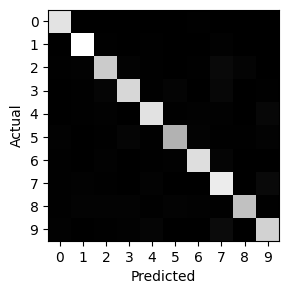

In [64]:
plt.figure(figsize=(3, 3))
plt.imshow(conf_mx, cmap=plt.cm.gray)
plt.xticks(ticks=range(10))
plt.yticks(ticks=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Compare Error Rates

In [65]:
row_sum = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sum

In [66]:
# Fill the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_mx, 0)

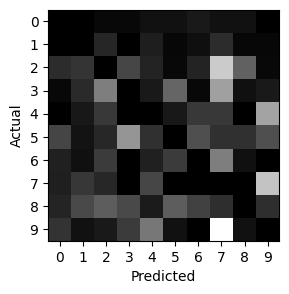

In [67]:
plt.figure(figsize=(3, 3))
plt.imshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xticks(ticks=range(10))
plt.yticks(ticks=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Analyzing Individual Error

In [68]:
cl_a, cl_b = '9', '7'
X_aa = X_train_scaled[(Y_train_over == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train_scaled[(Y_train_over == cl_a) & (y_train_pred == cl_b)]
X_ba  = X_train_scaled[(Y_train_over == cl_b) & (y_train_pred == cl_a)]
X_bb  = X_train_scaled[(Y_train_over == cl_b) & (y_train_pred == cl_b)]

In [69]:
def plot_digits(images, num_images=5):
    num_images = images.shape[0] if images.shape[0] < 25 else 25
    images = images[:num_images].reshape(-1, 28, 28)
    rows, cols = 5, 5

    plt.figure(figsize=(3, 3))
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap="binary")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

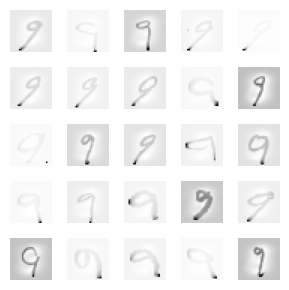

In [70]:
plot_digits(X_ab)

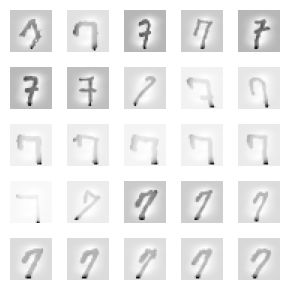

In [71]:
plot_digits(X_ba)

## Multilabel Classification

- It outputs multiple binary tags.

In [18]:
X_train_ovr = X_train[0:6000].to_numpy()
Y_train_over = y_train[0:6000].to_numpy().astype(int)

In [19]:
y_train_large = (Y_train_over >= 7)
y_train_large

array([False, False, False, ...,  True, False,  True], shape=(6000,))

In [20]:
y_train_odd = (Y_train_over % 2 ==1)
y_train_odd

array([ True, False, False, ..., False, False,  True], shape=(6000,))

In [21]:
y_multilable = np.c_[y_train_large, y_train_odd]
y_multilable

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [ True, False],
       [False, False],
       [ True,  True]], shape=(6000, 2))

In [22]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_ovr, y_multilable)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


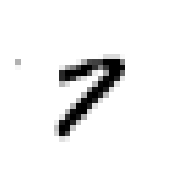

In [23]:
some_digit_multylable = X[29:30].to_numpy()
some_digit_multy_image_ovr = some_digit_multylable.reshape(28, 28)

plt.figure(figsize=(2, 2))
plt.imshow(some_digit_multy_image_ovr, cmap="binary")
plt.axis("off")
plt.show()

In [24]:
knn_clf.predict(some_digit_multylable)

array([[ True,  True]])